# Preprocess of removing outliers and uncorrelated columns (features)

# Read in training and test set data from csv files in first_preprocess folder

In [78]:
import numpy as np
import pandas as pd
import csv
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Select 8 months representing four seasons in 2020 in New York as training set for yellow taxis
# Reason of selecting these months to represent the seasons is from https://www.nyc.com/visitor_guide/weather_facts.75835/
year_train = ["2019-12", "2020-01", "2020-03", "2020-04", "2020-06", "2020-07", "2020-09", "2020-10"]

# Select 4 months to represent four seasons in 2020 as test set for yellow taxis' model
year_test = ["2020-02", "2020-05", "2020-08", "2020-11"]

# Formats for reading in csv files of green and yellow taxis from foloder containing first preprocessed data
yellow_format = "../raw_data/first_preprocess/yellow_{year}.csv"

# Merge the 13-month data for green and yellow taxis for training usage
merge_train_yellow = []
for train in year_train:
    merge_train_yellow.append(pd.read_csv(yellow_format.format(year = train), index_col=False, delimiter = ',', header = 0, low_memory = False))
train_yellow = pd.concat(merge_train_yellow)

# Merge the 2-month data for green and yellow taxis for test usage
merge_test_yellow = []
for test in year_test:
    merge_test_yellow.append(pd.read_csv(yellow_format.format(year = test), index_col=False, delimiter = ',', header = 0, low_memory = False))
test_yellow = pd.concat(merge_test_yellow)

# Once the "finish" is printed, the following cells can be run
print("finish")

finish


# Remove outlier instances base on selected features

In [79]:
# Remove the outliers from dataset for both green and yellow taxis which reduce less bias
# That is, exclude high leverage points (outliers) before fitting linear regression model

# Remove outliers from yellow taixs' training set
train_yellow = train_yellow[(np.abs(stats.zscore(train_yellow[train_yellow.columns.difference(['PULocationID', 'DOLocationID', 'passenger_count', 'tip_amount', 'tolls_amount', 'covid_count'])])) < 3).all(axis=1)]

# Remove outliers from yellow taixs' test set (enables a more accurate evaluation of the model for yellow taxi)
test_yellow = test_yellow[(np.abs(stats.zscore(test_yellow[test_yellow.columns.difference(['PULocationID', 'DOLocationID', 'passenger_count', 'tip_amount', 'tolls_amount', 'covid_count'])])) < 3).all(axis=1)]

# Plot distribution plot of tip_amount (include 0)

<Figure size 432x432 with 0 Axes>

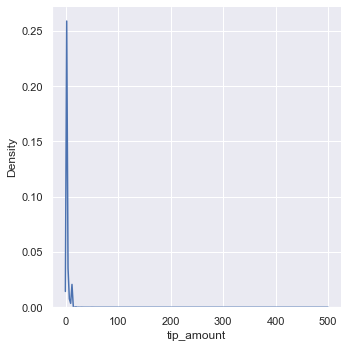

<Figure size 432x288 with 0 Axes>

In [80]:
# Draw density plot to present the distribution of yellow taxi tip_amount distribution including tip = 0
plt.figure(figsize=(6, 6))
sns.set_theme()
dist = sns.displot(data=train_yellow['tip_amount'], kind = "kde")
plt.show()
plt.savefig("../plots/tip.png")

# Plot distribution plot of tip_amount & a simulated normal distribution curve

<Figure size 432x432 with 0 Axes>

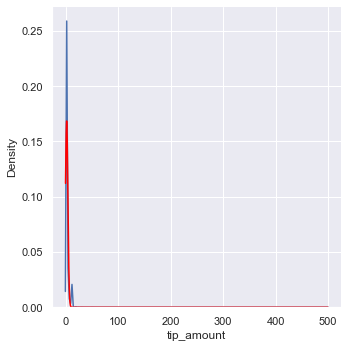

<Figure size 432x288 with 0 Axes>

In [81]:
# Draw density plot to present the distribution of yellow taxi tip_amount distribution including tip = 0
plt.figure(figsize=(6, 6))
sns.set_theme()
dist = sns.displot(data=train_yellow['tip_amount'], kind = "kde")
normplot = plt.plot(np.arange(0, 500, 0.01), norm.pdf(np.arange(0, 500, 0.01), 2.137023, 2.36721), color = 'red')
plt.show()
plt.savefig("../plots/tip_norm.png")

# Plot distribution plot of log(tip_amount) (exclude 0)

<Figure size 432x432 with 0 Axes>

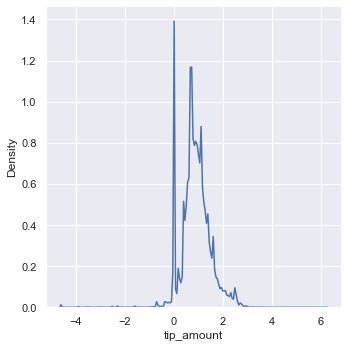

<Figure size 432x288 with 0 Axes>

In [82]:
# Draw density plot to present the distribution of yellow taxi log(tip_amount) distribution excluding tip = 0
plt.figure(figsize=(6, 6))
sns.set_theme()
dist = sns.displot(data=np.log((train_yellow.loc[(train_yellow['tip_amount'] > 0)])['tip_amount']), kind = "kde")
plt.show()
plt.savefig("../plots/log_tip.png")

# Plot correlation heatmap to have a preview of correlation between features

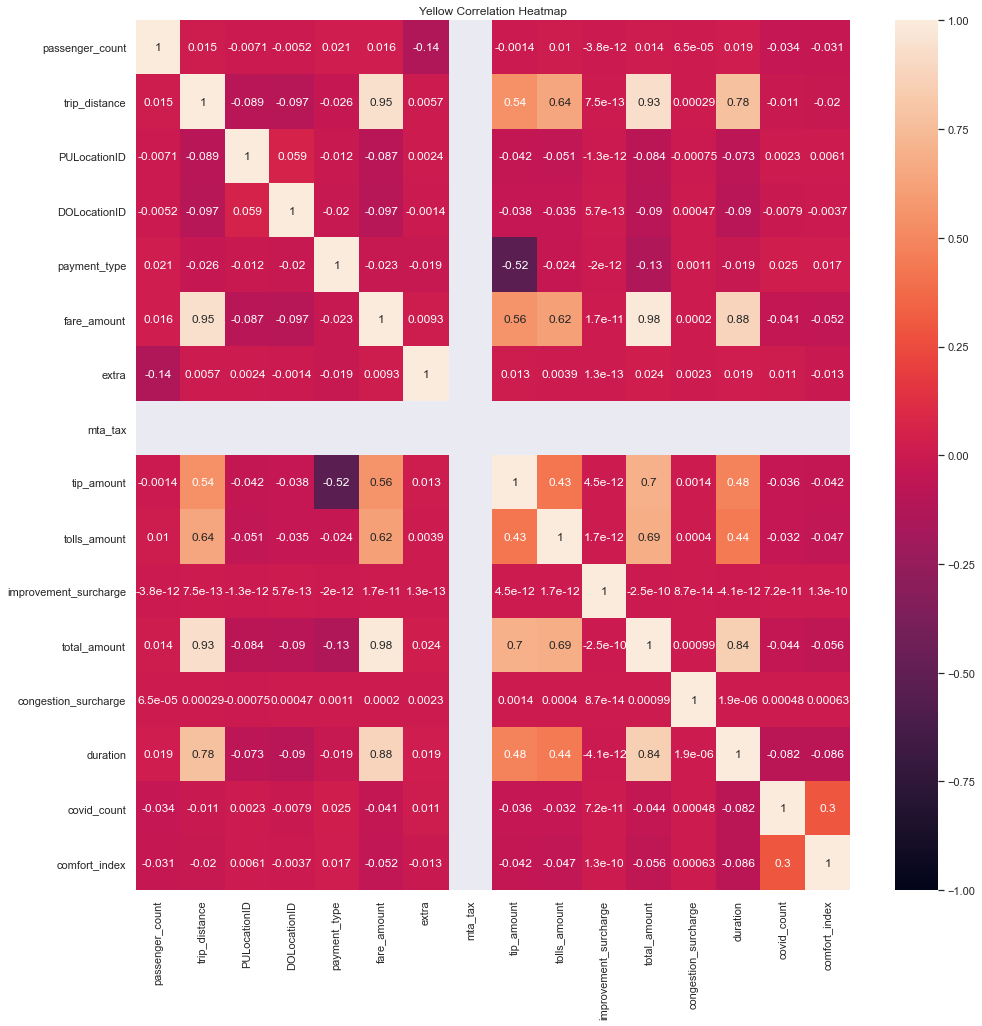

<Figure size 432x288 with 0 Axes>

In [83]:
# Use the yellow taxis' training data to plot correlation heatmap
# to figure out correlation between "tip_amount" and other factors

plt.figure(figsize=(16, 16))
corr = sns.heatmap(train_yellow.corr(), vmin=-1, vmax=1, annot=True)
corr.set_title('Yellow Correlation Heatmap')
plt.show()
plt.savefig("../plots/correlation_heatmap_yellow.png")

# Remove features which has small correlation with tip_amount
# (exclude consideration of covid and comfort_index)

In [84]:
# Remove factors base on Cohen's theory as corr < 0.1 indicates a trivial relation with "total_amount"
# Related webpage: http://www.psychology.emory.edu/clinical/bliwise/Tutorials/SCATTER/scatterplots/effect.htm

# Kept the same amount and kinds of factors in both dataset for green and yellow to control variables

# LocationID should be kept for geo-spatial plotting in following analysis
# Covid data should be kept for analysising the significance of effects towards green / yellow taix's total_amount

# Remove 'mat_tax'
train_yellow = train_yellow.drop(columns = 'mta_tax')
test_yellow = test_yellow.drop(columns = 'mta_tax')

# Remove 'improvement_surcharge'
train_yellow = train_yellow.drop(columns = 'improvement_surcharge')
test_yellow = test_yellow.drop(columns = 'improvement_surcharge')

# Remove 'passenger_count'
train_yellow = train_yellow.drop(columns = 'passenger_count')
test_yellow = test_yellow.drop(columns = 'passenger_count')

# Remove 'extra'
train_yellow = train_yellow.drop(columns = 'extra')
test_yellow = test_yellow.drop(columns = 'extra')

# Remove 'total_amount'
train_yellow = train_yellow.drop(columns = 'total_amount')
test_yellow = test_yellow.drop(columns = 'total_amount')

# Remove 'congestion_surcharge'
train_yellow = train_yellow.drop(columns = 'congestion_surcharge')
test_yellow = test_yellow.drop(columns = 'congestion_surcharge')

# convert payment_type into one-hot encoding style for model construction

In [85]:
df_one = pd.get_dummies(train_yellow["payment_type"])
df_one.rename(columns = {1.0:"payment_card", 2.0:"payment_cash"}, inplace = True)
train_yellow = pd.concat([train_yellow, df_one], axis = 1)

df_one = pd.get_dummies(test_yellow["payment_type"])
df_one.rename(columns = {1.0:"payment_card", 2.0:"payment_cash"}, inplace = True)
test_yellow = pd.concat([test_yellow, df_one], axis = 1)

train_yellow = train_yellow.drop(columns = "payment_type")
test_yellow = test_yellow.drop(columns = "payment_type")

# Plot the correlation heatmap with intersted features related to tip_amount

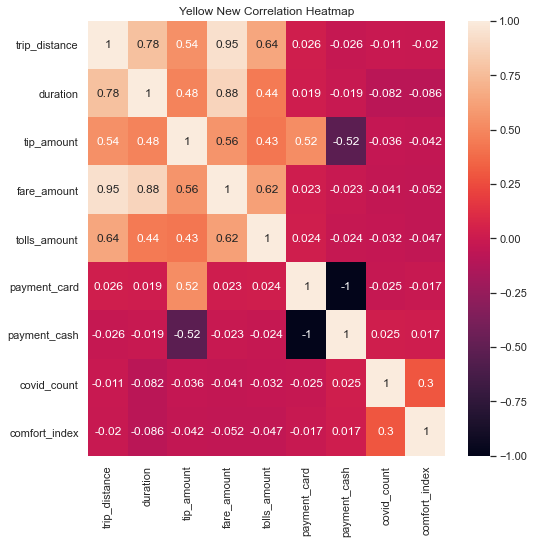

<Figure size 432x288 with 0 Axes>

In [86]:
# Use the yellow taxis' training data to plot correlation heatmap
# to figure out correlation between "tip_amount" and the remained factors

plt.figure(figsize=(8, 8))
corr = sns.heatmap(train_yellow[['trip_distance', 'duration','tip_amount', 'fare_amount', 'tolls_amount', 'payment_card', 'payment_cash', 'covid_count', 'comfort_index']].corr(), vmin=-1, vmax=1, annot=True)
corr.set_title('Yellow New Correlation Heatmap')
plt.show()
plt.savefig("../plots/correlation_heatmap_yellow_new.png")

# Plot pairplot (only for investigating tip_amount) with interested features

<Figure size 1008x144 with 0 Axes>

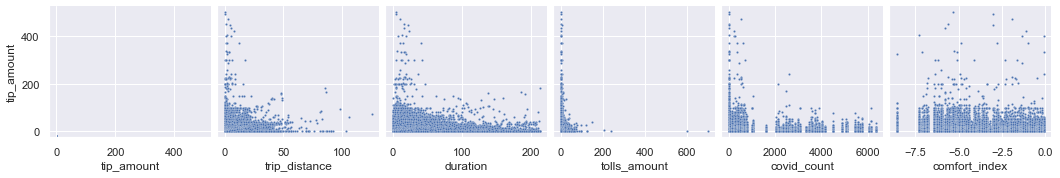

<Figure size 432x288 with 0 Axes>

In [87]:
# Plot the pair plots to have visualisation of correlation between tip_amount and other factor in yellow taxi

plt.figure(figsize=(14, 2))
pair = sns.pairplot(data = train_yellow, x_vars = ['tip_amount', 'trip_distance', 'duration', 'tolls_amount', 'covid_count', 'comfort_index'], y_vars = ['tip_amount'], plot_kws={"s": 5})
plt.show()
plt.savefig("../plots/pairplot_yellow.png")

# Remove redundent features

In [88]:
# remove "fare_amount" as it is largely correlated with trip_distance
train_yellow = train_yellow.drop(columns = 'fare_amount')
test_yellow = test_yellow.drop(columns = 'fare_amount')

# remove "payment_cash" as it is completted correlated with payment_card
train_yellow = train_yellow.drop(columns = 'payment_cash')
test_yellow = test_yellow.drop(columns = 'payment_cash')

# Create csv files for geo-spatial plotting (with locationID)

In [89]:
# convert the preprocessed data into csv files for geospatial constructing usage

train_yellow.to_csv('../preprocessed_data/geospatial_data/preprocessed_train_yellow.csv', index = False)
test_yellow.to_csv('../preprocessed_data/geospatial_data/preprocessed_test_yellow.csv', index = False)

# Once the preprocessed csv files are created, "finish" is printed
print("finish")

finish


# Remove locationID columns in both training and test set

In [90]:
# remove these columns and construct the dataset for training model for target value "tip_amount"

# remove "PULocationID"
train_yellow = train_yellow.drop(columns = 'PULocationID')
test_yellow = test_yellow.drop(columns = 'PULocationID')

# remove "DOLocationID"
train_yellow = train_yellow.drop(columns = 'DOLocationID')
test_yellow = test_yellow.drop(columns = 'DOLocationID')

# Create csv files for model-construction

In [91]:
# convert the preprocessed data into csv files for geospatial constructing usage

train_yellow.to_csv('../preprocessed_data/model_data/train_yellow.csv', index = False)
test_yellow.to_csv('../preprocessed_data/model_data/test_yellow.csv', index = False)

# Once the preprocessed csv files are created, "finish" is printed
print("finish")

finish
